<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/K-Nearest%20Neighbors%20-%20KNN/KNN_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/fruit_data_with_colors.txt'

dados = pd.read_csv( url )

In [90]:
dados.head()

,fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score
0,1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55
1,1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59
2,1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60
3,2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80
4,2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79


## O pandas tem dificulade em localizar o separador em arquivos TXT ( texto ). 

In [91]:
dados = pd.read_csv( url, sep='\t' )

In [92]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


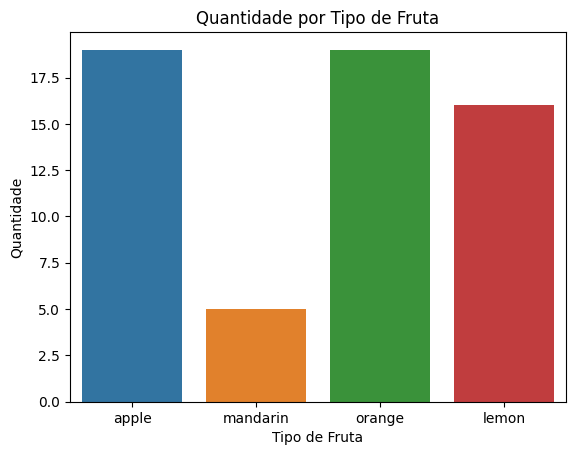

In [93]:
# Número de Classes (tipos de frutas) e suas respectivas quantidades
sns.countplot( x='fruit_name', data=dados)
plt.xlabel( 'Tipo de Fruta' )
plt.ylabel( 'Quantidade' )
plt.title( 'Quantidade por Tipo de Fruta' );

In [94]:
dados['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [95]:
dados.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [96]:
colunas = dados.columns
colunas

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [97]:
colunas = colunas.drop( ['fruit_label', 'fruit_name'] )

In [98]:
colunas

Index(['fruit_subtype', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [99]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler

normalizar = StandardScaler()

dados[ colunas.drop('fruit_subtype') ] = normalizar.fit_transform( dados[ colunas.drop( 'fruit_subtype' ) ] )

In [100]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,granny_smith,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,granny_smith,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,mandarin,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,mandarin,-1.450372,-1.364327,-2.292236,0.355872


# A coluna fruit_subtype é uma coluna categórica e precisa ser convertida.

In [101]:
from sklearn.preprocessing import LabelEncoder, label_binarize

In [102]:
encoder = LabelEncoder()

In [103]:
dados['fruit_subtype'] = encoder.fit_transform( dados['fruit_subtype'])

In [104]:
classes = dados['fruit_label'].unique()
n_classes = len( classes )

In [105]:
dados.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,3,0.529442,1.598690,-0.291397,-2.793595
1,1,apple,3,0.309462,1.104854,-0.661922,-2.268684
2,1,apple,3,0.236136,0.364100,-0.365502,-2.137456
3,2,mandarin,4,-1.413709,-1.117409,-2.218131,0.487100
4,2,mandarin,4,-1.450372,-1.364327,-2.292236,0.355872


## **Separando as variáveis X e y**

In [106]:
# convertedor para numpyarray
X = dados.drop( ['fruit_label', 'fruit_name' ], axis=1 ).values
y = dados['fruit_label' ].values

In [107]:
# Será útil para - curva ROC e Precision Recall )
y = label_binarize( y, classes=classes )

In [108]:
# Separando em amostras de treino e teste
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size=0.25, random_state = 0 )

In [110]:
from sklearn.neighbors import KNeighborsClassifier 

In [111]:
vizinhos = []
acc_treino = []
acc_teste = []
std = [];

In [112]:
# Calcular a melhor acurácia
for i in range(2, 11):
  # Número de Vizinhos -> n_neighnors
  vizinhos.append(i)
  # Criar o modelo
  knn = KNeighborsClassifier( n_neighbors=i )
  # treinar o modelo
  knn.fit( X_train, y_train )
  # Armazenar as acurácias ( treino e teste )
  acc_treino.append( knn.score( X_train, y_train ) )  
  acc_teste.append( knn.score( X_teste, y_teste ) )
  # Predição de y
  y_pred = knn.predict( X_teste )
  # Armazenando o Devio Padrão
  std.append( np.std( y_pred == y_teste ) / np.sqrt( y_pred.shape[0] ) )

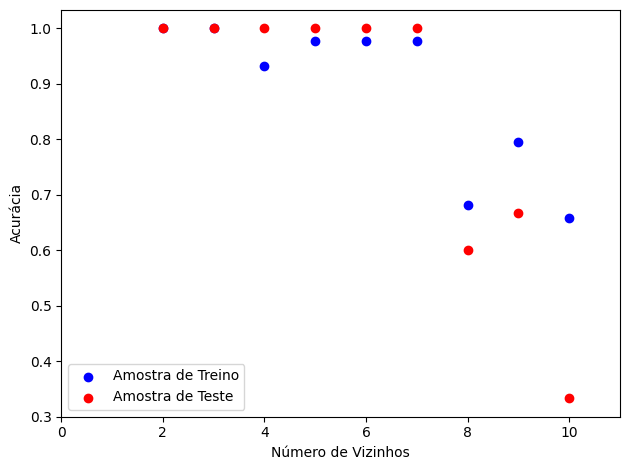

In [113]:
plt.scatter( vizinhos, acc_treino, label='Amostra de Treino', color='blue' )
plt.scatter( vizinhos, acc_teste,  label='Amostra de Teste',  color='red' )
plt.xlabel( 'Número de Vizinhos' )
plt.ylabel( 'Acurácia' )
plt.xlim( [ 0 ,11 ] ) 
plt.legend( loc='lower left' )
plt.tight_layout()

### Pode ser observado que no intervalo **( 0 < n_vizinhos < 5 )** a **acurácia** do **Treino** e **Teste** é praticamente máxima. Por esse motivo adoraremos n = 4.

In [114]:
# Recarregar o modelo KNN
knn = KNeighborsClassifier( n_neighbors = 4 )

In [115]:
# Treinar o modelo KNN
knn = knn.fit( X_train, y_train )

In [116]:
# Realizar a Predição
y_pred = knn.predict( X_teste )
y_prob = knn.predict_proba( X_teste )

### Matriz de Confusão

In [118]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix( y_teste.argmax(axis=1), y_pred.argmax(axis=1) )
cm

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 2]])

### Calculando as Métricas

In [119]:
from sklearn.metrics import classification_report, f1_score, precision_score, average_precision_score, recall_score, accuracy_score

In [120]:
# Classification Report
cr = classification_report( y_teste, y_pred )
print( cr );

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15
 samples avg       1.00      1.00      1.00        15



In [121]:
# F1-score
f1_macro = f1_score( y_teste, y_pred, average='macro')
print( 'F1 Macro Score = {:0.2f}%'.format( f1_macro * 100 ) )

f1_wei = f1_score( y_teste, y_pred, average='weighted' )
print( 'F1 Weighted Score = {:0.2f}%'.format( f1_wei * 100 ) )

F1 Macro Score = 100.00%
F1 Weighted Score = 100.00%


### Precision Score

In [122]:
# Precision Score
precision_macro = precision_score( y_teste, y_pred, average='macro')
print( 'F1 Precision Score = {:0.2f}%'.format( precision_macro * 100 ) )

precision_wei = precision_score( y_teste, y_pred, average='weighted' )
print( 'F1 Precision Score = {:0.2f}%'.format( precision_wei * 100 ) )

F1 Precision Score = 100.00%
F1 Precision Score = 100.00%


### Recall Score

In [123]:
# Recall Score
recall_macro = recall_score( y_teste, y_pred, average='macro')
print( 'F1 Recall Score = {:0.2f}%'.format( recall_macro * 100 ) )

recall_wei = recall_score( y_teste, y_pred, average='weighted' )
print( 'F1 Recall Score = {:0.2f}%'.format( recall_wei * 100 ) )

F1 Recall Score = 100.00%
F1 Recall Score = 100.00%


### Acurácia

In [124]:
acc = accuracy_score( y_teste, y_pred )
print( 'Accuracy Score = {:0.2f}%'.format( acc * 100 ) )

Accuracy Score = 100.00%


# **Curva ROC**


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.multiclass import OneVsRestClassifier

In [125]:
classes = dados['fruit_label'].unique()
n_classes = len( classes )

# Falsos Positivos
fpr = dict()

# Verdadeiros Positivos
tpr = dict()

roc_auc = dict()

# Calcular para cada uma das classes
for i in range( n_classes ):
  fpr[i], tpr[i], _ = roc_curve( y_teste[ :, i ], y_pred[ :, i ]  )
  roc_auc[ i ] = auc( fpr[ i ], tpr[ i ] ) * 100

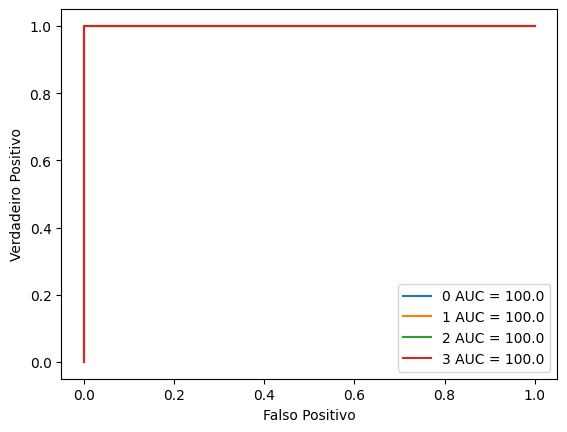

In [126]:
for i in range( n_classes ):
  plt.plot( fpr[i], tpr[i], label=str(i) + ' AUC = ' + str( roc_auc[i] ) )

plt.xlabel( 'Falso Positivo' )
plt.ylabel( 'Verdadeiro Positivo' )
plt.legend()

# **Curva Precision-Recall**


In [127]:
from sklearn.metrics import precision_recall_curve, auc

lr_precision = dict()
lr_recall = dict()
lr_auc = dict()

# Calcular para cada uma das classes
for i in range( n_classes ):
  lr_precision[i], lr_recall[i], _ = precision_recall_curve( y_teste[ :, i ], y_pred[ :, i ]  )
  lr_auc[ i ] = auc( lr_precision[ i ], lr_recall[ i ] ) * 100

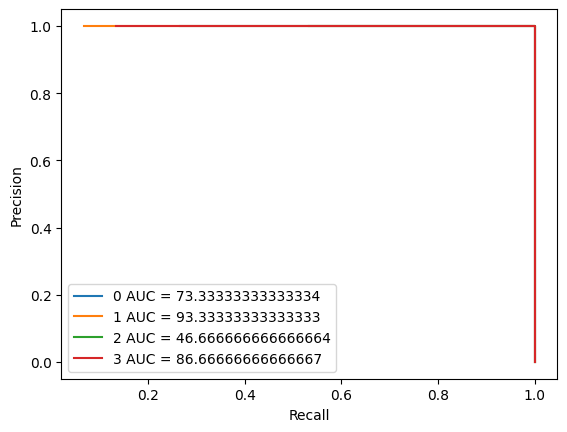

In [128]:
for i in range( n_classes ):
  plt.plot( lr_precision[i], lr_recall[i], label=str(i) + ' AUC = ' + str( lr_auc[i] ) )

plt.xlabel( 'Recall' )
plt.ylabel( 'Precision' )
plt.legend()